In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r'D:\Data Analytics Notes\Pr\Wine\python_for_datascience-master\college.csv')
df.head()

,Name of the Institution,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
df.columns

Index(['Name of the Institution', 'Private', 'Apps', 'Accept', 'Enroll',
       'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate',
       'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio',
       'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [26]:
df_final=df.copy() # making a copy of the dataset.

####  Removing Unnecessary variable

In [1]:
df_final.drop(['Name of the Institution','Private'],axis=1,inplace=True)
# Removing Name of the institution & Private from the dataset. 

NameError: name 'df_final' is not defined

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [54]:
df_final.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster_Made
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,2


Extract the measurements from the DataFrame using its .values attribute:

In [37]:
samples = df_final.values # get all row and columne with header 

samples

array([[1.6600e+03, 1.2320e+03, 7.2100e+02, ..., 1.2000e+01, 7.0410e+03,
        6.0000e+01],
       [2.1860e+03, 1.9240e+03, 5.1200e+02, ..., 1.6000e+01, 1.0527e+04,
        5.6000e+01],
       [1.4280e+03, 1.0970e+03, 3.3600e+02, ..., 3.0000e+01, 8.7350e+03,
        5.4000e+01],
       ...,
       [2.0970e+03, 1.9150e+03, 6.9500e+02, ..., 2.0000e+01, 8.3230e+03,
        4.9000e+01],
       [1.0705e+04, 2.4530e+03, 1.3170e+03, ..., 4.9000e+01, 4.0386e+04,
        9.9000e+01],
       [2.9890e+03, 1.8550e+03, 6.9100e+02, ..., 2.8000e+01, 4.5090e+03,
        9.9000e+01]])

### Step 3:
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

In [41]:
from sklearn.cluster import KMeans

ks = range(1,6)   #ks=1,2,3,4,5
SSE = [] # within-cluster sum-of-squares

for k in ks:  # k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_) 
    # Inertia: Sum of distances of samplesto their closest cluster center

D:\Data Science\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [42]:
SSE   

[72040559613.94104,
 48356202264.49213,
 32365874599.916077,
 25521236525.89885,
 20753272574.166172]

#### Elbow Method 

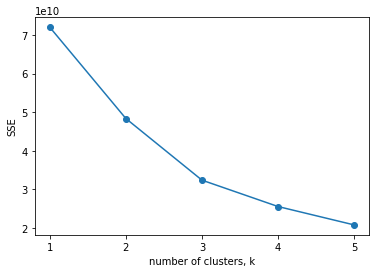

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE, '-o') # -o is point in graph to identify the cluster
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

In [52]:
model2 = KMeans(n_clusters=3,max_iter=100) # Taking 3 clusters for the Analysis.

In [53]:
df_final['Cluster_Made'] = model2.fit_predict(samples)
df_final.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster_Made
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,2


In [51]:
df_final.Cluster_Made.value_counts()

0    565
2    129
1     83
Name: Cluster_Made, dtype: int64